#### Boisset et al Bone Marrow Experiment

Micro-dissected: JC20, JC21,JC26, JC27, JC28, JC30, JC32, JC32, JC35, JC36, JC37,JC39, JC40,JC41,JC43,JC44,JC45,JC46,JC47

Sorted single cell: JC4, JC48P2,JC48P4, JC48P6, JC48P7

In [778]:
import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sb
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
from matplotlib.transforms import Bbox
sys.path.append('../code/')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from ldaSingleCell import VariationalLDA
from utilsFuncs import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
jc20 = pd.read_csv("/data/Alex/Boisset/GSE76983_expdata_BMJhscC.csv",sep="\t",header=0, index_col=0)

In [3]:
jc20.shape

(23536, 1915)

In [9]:
jc20[jc20.astype(bool).sum(axis=1)>10]

,JC4_349_HSC_FE_S13_,JC4_350_HSC_FE_S13_,JC4_351_HSC_FE_S13_,JC4_352_HSC_FE_S13_,JC4_353_HSC_FE_S13_,JC4_354_HSC_FE_S13_,JC4_355_HSC_FE_S13_,JC4_356_HSC_FE_S13_,JC4_357_HSC_FE_S13_,JC4_358_HSC_FE_S13_,...,JC48P6_1195_HSC_FE_S8_,JC48P6_1196_HSC_FE_S8_,JC48P6_1197_HSC_FE_S8_,JC48P6_1198_HSC_FE_S8_,JC48P6_1199_HSC_FE_S8_,JC48P6_1200_HSC_FE_S8_,JC48P6_1201_HSC_FE_S8_,JC48P6_1202_HSC_FE_S8_,JC48P6_1203_HSC_FE_S8_,JC48P6_1204_HSC_FE_S8_
GENEID,,,,,,,,,,,,,,,,,,,,,
0610007P14Rik__chr12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,1.001958,0.000000,0.0,1.001958,1.001958
0610009B22Rik__chr11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
0610009D07Rik__chr12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,1.001958,1.001958,0.0,0.000000,0.000000
0610009L18Rik__chr11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.001958,0.000000,0.000000,0.0,0.000000,0.000000
0610009O20Rik__chr18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zxdc__chr6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.001958,0.0,0.000000,0.000000
Zyg11b__chr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.001958,0.000000,0.000000,0.0,0.000000,0.000000
Zyx__chr6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.007853,0.0,0.0,2.007853,2.007853,1.001958,0.0,0.000000,2.007853


In [10]:
jc20 = jc20[jc20.astype(bool).sum(axis=1)>10]

In [11]:
sortedCells = jc20.filter(regex='JC4_|JC48P')

In [12]:
dissected = jc20.filter(regex="JC2._|JC3._|JC40_|JC41_|JC43_|JC44_|JC45_|JC46_|JC47_",axis=1)

In [13]:
sortedCells = sortedCells.T

In [15]:
sortedCells = sortedCells[sortedCells.sum(axis=1)>0]

In [16]:
sortedCells = sortedCells.T

In [17]:
sortedCells

,JC4_349_HSC_FE_S13_,JC4_350_HSC_FE_S13_,JC4_351_HSC_FE_S13_,JC4_352_HSC_FE_S13_,JC4_353_HSC_FE_S13_,JC4_354_HSC_FE_S13_,JC4_355_HSC_FE_S13_,JC4_356_HSC_FE_S13_,JC4_357_HSC_FE_S13_,JC4_358_HSC_FE_S13_,...,JC48P6_1195_HSC_FE_S8_,JC48P6_1196_HSC_FE_S8_,JC48P6_1197_HSC_FE_S8_,JC48P6_1198_HSC_FE_S8_,JC48P6_1199_HSC_FE_S8_,JC48P6_1200_HSC_FE_S8_,JC48P6_1201_HSC_FE_S8_,JC48P6_1202_HSC_FE_S8_,JC48P6_1203_HSC_FE_S8_,JC48P6_1204_HSC_FE_S8_
GENEID,,,,,,,,,,,,,,,,,,,,,
0610007P14Rik__chr12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,1.001958,0.000000,0.0,1.001958,1.001958
0610009B22Rik__chr11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
0610009D07Rik__chr12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,1.001958,1.001958,0.0,0.000000,0.000000
0610009L18Rik__chr11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.001958,0.000000,0.000000,0.0,0.000000,0.000000
0610009O20Rik__chr18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zxdc__chr6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,1.001958,0.0,0.000000,0.000000
Zyg11b__chr4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,1.001958,0.000000,0.000000,0.0,0.000000,0.000000
Zyx__chr6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.007853,0.0,0.0,2.007853,2.007853,1.001958,0.0,0.000000,2.007853


In [60]:
dissected.shape

(10796, 1546)

In [45]:
singleCellLDA = VariationalLDA(K = 50,alpha = 1,eta=0.005,update_alpha=True)
singleCellLDA.load_data_sc(sortedCells)
singleCellLDA.run_vb(n_its = 1000,initialise=True)

Edited
Initialising
Starting iterations


/home1/2064240p/SimonLDA/lda/code/ldaSingleCell.py:442: RuntimeWarning: divide by zero encountered in log
  log_phi_matrix = np.log(self.beta_matrix[:,w]) + psi(self.gamma_matrix[d,:]).T


Iteration 0 (change = 74.08334188169795) (20.81000000000131 seconds, I think I'll finish in 346.83333333335514 minutes). Alpha: (2.694324365866875,5.276978723153437)
Iteration 1 (change = 0.5991614654377272) (18.860000000000582 seconds, I think I'll finish in 314.01900000000967 minutes). Alpha: (5.983324499808483,13.766007519597979)
Iteration 2 (change = 0.609279097218607) (19.36999999999898 seconds, I think I'll finish in 322.1876666666497 minutes). Alpha: (9.874906006765436,23.581146020821947)
Iteration 3 (change = 0.5762671982615492) (18.979999999999563 seconds, I think I'll finish in 315.3843333333261 minutes). Alpha: (13.786940228093783,33.24387720638213)
Iteration 4 (change = 0.5412005293029898) (18.93999999999869 seconds, I think I'll finish in 314.4039999999783 minutes). Alpha: (17.571525917036176,42.47342399286159)
Iteration 5 (change = 0.5127583996366916) (18.320000000003347 seconds, I think I'll finish in 303.80666666672215 minutes). Alpha: (21.169070465021267,51.18347895175

Iteration 49 (change = 0.34338522531840127) (18.709999999999127 seconds, I think I'll finish in 296.5534999999862 minutes). Alpha: (41.41929895872561,99.68859353731563)
Iteration 50 (change = 0.35157912805177743) (18.659999999999854 seconds, I think I'll finish in 295.4499999999977 minutes). Alpha: (39.68695517789515,95.51343628828415)
Iteration 51 (change = 0.3609305482321101) (18.87000000000262 seconds, I think I'll finish in 298.4605000000414 minutes). Alpha: (37.8906030932071,91.1838948281609)
Iteration 52 (change = 0.37137044895599436) (18.75 seconds, I think I'll finish in 296.25 minutes). Alpha: (36.040975836884975,86.72587813671755)
Iteration 53 (change = 0.3829338418311408) (18.909999999999854 seconds, I think I'll finish in 298.46283333333105 minutes). Alpha: (34.151281827767235,82.17131005450675)
Iteration 54 (change = 0.3956305337853303) (18.80999999999767 seconds, I think I'll finish in 296.5709999999633 minutes). Alpha: (32.23706348691566,77.5577572551239)
Iteration 55 (c

Iteration 99 (change = 1.6775657044915775) (18.32999999999811 seconds, I think I'll finish in 275.2554999999716 minutes). Alpha: (1.108512264136221,3.41654208971651)
Iteration 100 (change = 1.6856584116840472) (18.389999999999418 seconds, I think I'll finish in 275.84999999999127 minutes). Alpha: (1.0299059543405193,3.2637151875132977)
Iteration 101 (change = 1.692231744446586) (18.30000000000291 seconds, I think I'll finish in 274.1950000000436 minutes). Alpha: (0.9578967591041953,3.120882754420678)
Iteration 102 (change = 1.6968042311270408) (18.389999999999418 seconds, I think I'll finish in 275.23699999999127 minutes). Alpha: (0.8918424821225093,2.9870988750665806)
Iteration 103 (change = 1.700481549136119) (18.5 seconds, I think I'll finish in 276.575 minutes). Alpha: (0.8311554699411463,2.861525083625879)
Iteration 104 (change = 1.70317026024386) (18.389999999999418 seconds, I think I'll finish in 274.6239999999913 minutes). Alpha: (0.7752995495725103,2.743399802058201)
Iteration

Iteration 148 (change = 0.7800265929121009) (18.099999999998545 seconds, I think I'll finish in 257.01999999997935 minutes). Alpha: (0.027495123036961975,0.7080882559458099)
Iteration 149 (change = 0.7581688203774793) (18.070000000003347 seconds, I think I'll finish in 256.2928333333808 minutes). Alpha: (0.026485758911042035,0.6961955962402575)
Iteration 150 (change = 0.7377058666993389) (18.289999999997235 seconds, I think I'll finish in 259.1083333332942 minutes). Alpha: (0.02554296338557406,0.6850088628633433)
Iteration 151 (change = 0.7180946118849457) (18.13000000000102 seconds, I think I'll finish in 256.5395000000144 minutes). Alpha: (0.024644801132754652,0.6744713819184601)
Iteration 152 (change = 0.6994035519187809) (18.080000000001746 seconds, I think I'll finish in 255.53066666669136 minutes). Alpha: (0.023819601710882796,0.6645667845659928)
Iteration 153 (change = 0.6818320181165636) (18.12999999999738 seconds, I think I'll finish in 255.9351666666297 minutes). Alpha: (0.02

Iteration 196 (change = 0.39837992210006057) (18.099999999998545 seconds, I think I'll finish in 242.5399999999805 minutes). Alpha: (0.009084564991956307,0.4886088291595843)
Iteration 197 (change = 0.39198532721827706) (18.160000000003492 seconds, I think I'll finish in 243.04133333338007 minutes). Alpha: (0.008956416831515688,0.48660774608565516)
Iteration 198 (change = 0.38490391122129247) (18.11999999999898 seconds, I think I'll finish in 242.2039999999864 minutes). Alpha: (0.008834434327052476,0.48467427454261597)
Iteration 199 (change = 0.3770242227798342) (18.020000000000437 seconds, I think I'll finish in 240.56700000000583 minutes). Alpha: (0.008718054708120117,0.482741102871427)
Iteration 200 (change = 0.3684918380336281) (18.020000000000437 seconds, I think I'll finish in 240.26666666667248 minutes). Alpha: (0.008606157340725312,0.4808201261582451)
Iteration 201 (change = 0.3599155533343115) (17.979999999999563 seconds, I think I'll finish in 239.43366666666086 minutes). Alph

Iteration 243 (change = 0.20893215610823695) (18.419999999998254 seconds, I think I'll finish in 232.39899999997797 minutes). Alpha: (0.005020741911950845,0.41905148315944923)
Iteration 244 (change = 0.2078088269587019) (18.110000000000582 seconds, I think I'll finish in 228.18600000000734 minutes). Alpha: (0.004968682877952842,0.4178703690348832)
Iteration 245 (change = 0.20704240475463281) (18.110000000000582 seconds, I think I'll finish in 227.884166666674 minutes). Alpha: (0.004918351214008942,0.4166493796289279)
Iteration 246 (change = 0.20620140342688464) (18.280000000002474 seconds, I think I'll finish in 229.71866666669774 minutes). Alpha: (0.004869664130260921,0.4154135041641825)
Iteration 247 (change = 0.20526676001462232) (18.109999999996944 seconds, I think I'll finish in 227.28049999996165 minutes). Alpha: (0.004822543047360173,0.4141608961704626)
Iteration 248 (change = 0.2047579669840155) (18.13000000000102 seconds, I think I'll finish in 227.2293333333461 minutes). Alph

Iteration 295 (change = 0.14695544964234086) (18.31000000000131 seconds, I think I'll finish in 215.1425000000154 minutes). Alpha: (0.003316079132425962,0.34829364851665007)
Iteration 296 (change = 0.14663739451012092) (18.099999999998545 seconds, I think I'll finish in 212.37333333331625 minutes). Alpha: (0.00329815101140874,0.34697004596229386)
Iteration 297 (change = 0.14640927808941195) (18.0 seconds, I think I'll finish in 210.9 minutes). Alpha: (0.0032805769168202633,0.3456263663451157)
Iteration 298 (change = 0.14619906646761174) (18.049999999999272 seconds, I think I'll finish in 211.18499999999148 minutes). Alpha: (0.00326334358048731,0.3442436688225978)
Iteration 299 (change = 0.14596430732562687) (18.0 seconds, I think I'll finish in 210.3 minutes). Alpha: (0.0032464382108469618,0.3428167458594842)
Iteration 306 (change = 0.14454218911986333) (18.11999999999898 seconds, I think I'll finish in 209.58799999998823 minutes). Alpha: (0.0031364800806735864,0.33206530841376547)
Ite

Iteration 353 (change = 0.16659921558555893) (18.049999999999272 seconds, I think I'll finish in 194.6391666666588 minutes). Alpha: (0.002638593357802341,0.2656567605967092)
Iteration 354 (change = 0.16869996052745498) (18.19000000000233 seconds, I think I'll finish in 195.84566666669173 minutes). Alpha: (0.002630873588987823,0.26429901898659897)
Iteration 355 (change = 0.17099240260797044) (18.11999999999898 seconds, I think I'll finish in 194.78999999998905 minutes). Alpha: (0.0026232407915669693,0.26296988497676177)
Iteration 356 (change = 0.17343260378547548) (18.459999999999127 seconds, I think I'll finish in 198.13733333332397 minutes). Alpha: (0.0026156948377591455,0.2616775076245163)
Iteration 357 (change = 0.17577522025104791) (18.470000000001164 seconds, I think I'll finish in 197.93683333334582 minutes). Alpha: (0.0026082372253031527,0.26042029047618276)
Iteration 358 (change = 0.17763134014184276) (18.06999999999971 seconds, I think I'll finish in 193.3489999999969 minutes)

Iteration 401 (change = 0.2839798982295076) (17.790000000000873 seconds, I think I'll finish in 177.60350000000872 minutes). Alpha: (0.0022285270935142243,0.1989556995911594)
Iteration 402 (change = 0.2833911829950983) (17.979999999999563 seconds, I think I'll finish in 179.20066666666233 minutes). Alpha: (0.0022185329150746294,0.19743479185563556)
Iteration 403 (change = 0.2804492316806985) (17.739999999997963 seconds, I think I'll finish in 176.51299999997974 minutes). Alpha: (0.002208654439954606,0.19606162409724484)
Iteration 404 (change = 0.2751157438401058) (18.220000000001164 seconds, I think I'll finish in 180.9853333333449 minutes). Alpha: (0.002198888071222872,0.19485105324072263)
Iteration 405 (change = 0.26792883896150227) (18.0 seconds, I think I'll finish in 178.5 minutes). Alpha: (0.002189232502805236,0.19384150536700945)
Iteration 406 (change = 0.25977348698901076) (18.169999999998254 seconds, I think I'll finish in 179.8829999999827 minutes). Alpha: (0.0021796846677415

Iteration 449 (change = 0.1279792670961361) (18.110000000000582 seconds, I think I'll finish in 166.31016666667202 minutes). Alpha: (0.0017401438742276243,0.15629954529317575)
Iteration 450 (change = 0.1275369358583504) (18.159999999999854 seconds, I think I'll finish in 166.46666666666533 minutes). Alpha: (0.0017310357164574395,0.15557289725612172)
Iteration 451 (change = 0.12697400876900092) (18.020000000000437 seconds, I think I'll finish in 164.883000000004 minutes). Alpha: (0.0017220471317106376,0.15480284367253996)
Iteration 452 (change = 0.12607338379141636) (17.86999999999898 seconds, I think I'll finish in 163.21266666665736 minutes). Alpha: (0.001713177439557157,0.15400333682635708)
Iteration 453 (change = 0.12489972637098126) (18.200000000000728 seconds, I think I'll finish in 165.92333333333997 minutes). Alpha: (0.0017044263304253238,0.1533002639533263)
Iteration 454 (change = 0.12387955769379527) (18.07999999999811 seconds, I think I'll finish in 164.5279999999828 minutes)

Iteration 496 (change = 0.09753787906623676) (18.849999999998545 seconds, I think I'll finish in 158.33999999998778 minutes). Alpha: (0.0014152581715753568,0.12672991665475275)
Iteration 497 (change = 0.0972669952105125) (18.700000000000728 seconds, I think I'll finish in 156.76833333333943 minutes). Alpha: (0.0014100724584337981,0.12628696393622987)
Iteration 498 (change = 0.09742676669770711) (18.770000000000437 seconds, I think I'll finish in 157.04233333333698 minutes). Alpha: (0.001404939463795777,0.12585589523970037)
Iteration 499 (change = 0.09761045781445132) (18.719999999997526 seconds, I think I'll finish in 156.31199999997935 minutes). Alpha: (0.001399859370988135,0.12542607704214936)
Iteration 500 (change = 0.09752521236339405) (18.75 seconds, I think I'll finish in 156.25 minutes). Alpha: (0.0013948302881280662,0.1249709031928661)
Iteration 501 (change = 0.0971554432090692) (18.700000000000728 seconds, I think I'll finish in 155.52166666667273 minutes). Alpha: (0.001389848

Iteration 544 (change = 0.07761953300164932) (18.37000000000262 seconds, I think I'll finish in 139.61200000001992 minutes). Alpha: (0.001209991342154294,0.10086729598364538)
Iteration 545 (change = 0.07736140109309754) (18.61999999999898 seconds, I think I'll finish in 141.20166666665895 minutes). Alpha: (0.0012064849079841072,0.10050236454520614)
Iteration 546 (change = 0.07666854351560382) (18.669999999998254 seconds, I think I'll finish in 141.26966666665345 minutes). Alpha: (0.0012030028120452302,0.10016348841472827)
Iteration 547 (change = 0.07559297455994364) (18.450000000000728 seconds, I think I'll finish in 139.2975000000055 minutes). Alpha: (0.0011995451722406135,0.09983223974968757)
Iteration 548 (change = 0.07419638829580515) (18.479999999999563 seconds, I think I'll finish in 139.2159999999967 minutes). Alpha: (0.0011961112607729765,0.09949301264725226)
Iteration 549 (change = 0.07243745588491562) (18.5 seconds, I think I'll finish in 139.05833333333334 minutes). Alpha: (

Iteration 591 (change = 0.06429278282260588) (19.0099999999984 seconds, I think I'll finish in 129.58483333332242 minutes). Alpha: (0.0010655727370573178,0.07976558605927332)
Iteration 592 (change = 0.06187808847016559) (18.960000000002765 seconds, I think I'll finish in 128.9280000000188 minutes). Alpha: (0.0010629006486710623,0.07942905649870069)
Iteration 593 (change = 0.0586351717361268) (19.139999999999418 seconds, I think I'll finish in 129.83299999999605 minutes). Alpha: (0.0010602441037249112,0.0790166443994958)
Iteration 594 (change = 0.05609002890522819) (19.05999999999767 seconds, I think I'll finish in 128.97266666665092 minutes). Alpha: (0.0010576043104926793,0.07866696877701819)
Iteration 595 (change = 0.054892699681063174) (19.05000000000291 seconds, I think I'll finish in 128.58750000001965 minutes). Alpha: (0.0010549796083868738,0.07828266159736008)
Iteration 596 (change = 0.055258793510529175) (19.209999999999127 seconds, I think I'll finish in 129.34733333332744 minu

Iteration 638 (change = 0.026918173414182473) (18.919999999998254 seconds, I think I'll finish in 114.15066666665614 minutes). Alpha: (0.0009531224672911014,0.06087780632815539)
Iteration 639 (change = 0.02674814433753437) (19.460000000002765 seconds, I think I'll finish in 117.08433333334997 minutes). Alpha: (0.0009510039005105144,0.06066369653125312)
Iteration 640 (change = 0.0266344743986038) (19.549999999999272 seconds, I think I'll finish in 117.29999999999563 minutes). Alpha: (0.0009488989087435531,0.060494072582374166)
Iteration 641 (change = 0.02654821629846676) (19.5099999999984 seconds, I think I'll finish in 116.73483333332375 minutes). Alpha: (0.0009468077997499483,0.06034377906537953)
Iteration 642 (change = 0.02647871166139433) (19.729999999999563 seconds, I think I'll finish in 117.72233333333072 minutes). Alpha: (0.0009447299196771532,0.06018841349491988)
Iteration 643 (change = 0.026427226133541124) (20.05000000000291 seconds, I think I'll finish in 119.29750000001732 

Iteration 685 (change = 0.02165352457849016) (18.38000000000102 seconds, I think I'll finish in 96.49500000000535 minutes). Alpha: (0.0008649585373588669,0.05028927271226368)
Iteration 686 (change = 0.021433804460784946) (18.419999999998254 seconds, I think I'll finish in 96.39799999999086 minutes). Alpha: (0.0008632811369479095,0.05007981968497216)
Iteration 687 (change = 0.021231991000917015) (18.17000000000189 seconds, I think I'll finish in 94.7868333333432 minutes). Alpha: (0.0008616090883929675,0.0498036288561427)
Iteration 688 (change = 0.02105367107225021) (18.43000000000029 seconds, I think I'll finish in 95.83600000000152 minutes). Alpha: (0.0008599402680544036,0.0494310552693739)
Iteration 689 (change = 0.020896890398328417) (18.470000000001164 seconds, I think I'll finish in 95.7361666666727 minutes). Alpha: (0.0008582768011302849,0.04914654772782845)
Iteration 690 (change = 0.020762238901534637) (18.179999999996653 seconds, I think I'll finish in 93.92999999998271 minutes)

Iteration 732 (change = 0.02133259029580118) (18.909999999999854 seconds, I think I'll finish in 84.46466666666602 minutes). Alpha: (0.0007932242422915677,0.041270378858012456)
Iteration 733 (change = 0.02135984482567705) (19.290000000000873 seconds, I think I'll finish in 85.84050000000389 minutes). Alpha: (0.0007918487226246672,0.04115861410687248)
Iteration 734 (change = 0.021369606582654233) (19.32999999999811 seconds, I think I'll finish in 85.69633333332494 minutes). Alpha: (0.0007904795089442204,0.041062310499652636)
Iteration 735 (change = 0.021366981833493226) (19.470000000001164 seconds, I think I'll finish in 85.99250000000514 minutes). Alpha: (0.0007891170235261233,0.04097476184831096)
Iteration 736 (change = 0.021344852786538564) (19.219999999997526 seconds, I think I'll finish in 84.56799999998911 minutes). Alpha: (0.0007877611327861155,0.0408895304769515)
Iteration 737 (change = 0.021300873201316652) (19.570000000003347 seconds, I think I'll finish in 85.781833333348 min

Iteration 779 (change = 0.0173933214194734) (18.5 seconds, I think I'll finish in 68.14166666666667 minutes). Alpha: (0.0007333216238919479,0.0349211828440654)
Iteration 780 (change = 0.01745610731140367) (18.600000000002183 seconds, I think I'll finish in 68.200000000008 minutes). Alpha: (0.000732159344286188,0.03487281629372978)
Iteration 781 (change = 0.017500660252206368) (18.669999999998254 seconds, I think I'll finish in 68.14549999999363 minutes). Alpha: (0.0007310023371283239,0.03482388924243982)
Iteration 782 (change = 0.017555711477469413) (18.56999999999971 seconds, I think I'll finish in 67.47099999999894 minutes). Alpha: (0.0007298498502733721,0.034772969913955495)
Iteration 783 (change = 0.01762267759445795) (18.659999999999854 seconds, I think I'll finish in 67.48699999999947 minutes). Alpha: (0.0007287024284152992,0.034722095226115704)
Iteration 784 (change = 0.01769289698074803) (18.790000000000873 seconds, I think I'll finish in 67.64400000000315 minutes). Alpha: (0.0

Iteration 826 (change = 0.025881391262452928) (18.280000000002474 seconds, I think I'll finish in 53.01200000000718 minutes). Alpha: (0.0006822436642739465,0.03039130295214535)
Iteration 827 (change = 0.02562135675547174) (18.159999999999854 seconds, I think I'll finish in 52.361333333332915 minutes). Alpha: (0.0006812302050078475,0.03027634725369201)
Iteration 828 (change = 0.025308073209215874) (18.110000000000582 seconds, I think I'll finish in 51.915333333335 minutes). Alpha: (0.000680220017272982,0.0301651624302257)
Iteration 829 (change = 0.02493257324382535) (18.279999999998836 seconds, I think I'll finish in 52.09799999999668 minutes). Alpha: (0.0006792123895415035,0.030021105133087672)
Iteration 830 (change = 0.024440854803277623) (18.11999999999898 seconds, I think I'll finish in 51.33999999999711 minutes). Alpha: (0.0006782083495205016,0.029909392841573866)
Iteration 831 (change = 0.023772961754375564) (18.2400000000016 seconds, I think I'll finish in 51.37600000000451 minut

Iteration 873 (change = 0.019428078490136134) (18.979999999999563 seconds, I think I'll finish in 40.174333333332406 minutes). Alpha: (0.0006374773935113023,0.0268957194999309)
Iteration 874 (change = 0.01952710118401994) (18.919999999998254 seconds, I think I'll finish in 39.73199999999633 minutes). Alpha: (0.0006365569168551039,0.02680351747031679)
Iteration 875 (change = 0.019624384353174228) (18.9800000000032 seconds, I think I'll finish in 39.541666666673336 minutes). Alpha: (0.0006356377164380221,0.026727426756695285)
Iteration 876 (change = 0.01970456161240935) (18.799999999999272 seconds, I think I'll finish in 38.85333333333183 minutes). Alpha: (0.0006347205871351356,0.026662670326585813)
Iteration 877 (change = 0.019766205821250004) (18.55999999999767 seconds, I think I'll finish in 38.04799999999523 minutes). Alpha: (0.0006338061198855412,0.026605092903233783)
Iteration 878 (change = 0.019812175952230823) (18.770000000000437 seconds, I think I'll finish in 38.165666666667555

Iteration 920 (change = 0.028592245946764766) (18.05999999999767 seconds, I think I'll finish in 24.079999999996897 minutes). Alpha: (0.0005963396104316297,0.02450551563699855)
Iteration 921 (change = 0.028866774397609915) (17.81999999999971 seconds, I think I'll finish in 23.462999999999617 minutes). Alpha: (0.0005955152137206803,0.024467940463527432)
Iteration 922 (change = 0.029222286133350834) (18.12000000000262 seconds, I think I'll finish in 23.556000000003404 minutes). Alpha: (0.0005946905824112082,0.02442553473514246)
Iteration 923 (change = 0.029757132942997394) (18.029999999998836 seconds, I think I'll finish in 23.138499999998505 minutes). Alpha: (0.0005938662171695153,0.024379607306601974)
Iteration 924 (change = 0.030428787486909713) (17.839999999996508 seconds, I think I'll finish in 22.59733333332891 minutes). Alpha: (0.0005930424026213114,0.02432656868944075)
Iteration 925 (change = 0.03117445228844129) (17.94000000000233 seconds, I think I'll finish in 22.4250000000029

Iteration 967 (change = 0.041855579636125) (18.64999999999418 seconds, I think I'll finish in 10.2574999999968 minutes). Alpha: (0.0005586645024962895,0.02197319369767302)
Iteration 968 (change = 0.04131497751536595) (18.900000000001455 seconds, I think I'll finish in 10.080000000000776 minutes). Alpha: (0.0005578948857736227,0.021929961621213065)
Iteration 969 (change = 0.040854813918789944) (18.630000000004657 seconds, I think I'll finish in 9.625500000002406 minutes). Alpha: (0.0005571259961293667,0.02187994822060089)
Iteration 970 (change = 0.040416576171996337) (18.479999999995925 seconds, I think I'll finish in 9.239999999997963 minutes). Alpha: (0.0005563563537845166,0.021781497845059828)
Iteration 971 (change = 0.039964147418514305) (18.639999999999418 seconds, I think I'll finish in 9.009333333333052 minutes). Alpha: (0.0005555864842562091,0.021698031546828797)
Iteration 972 (change = 0.039465495787605644) (18.93000000000029 seconds, I think I'll finish in 8.834000000000136 mi

In [46]:
np.savetxt("betasBM2021.txt",singleCellLDA.beta_matrix, delimiter=",")

In [47]:
betas_learned = pd.read_csv("betasBM2021.txt",sep=",",header=None)

In [48]:
topic_dict = betas_learned.to_dict(orient='index')

In [50]:
scLDA = VariationalLDA(corpus=singleCellLDA.corpus,K=15,
                       word_index=singleCellLDA.word_index,
                       alpha=1,eta=0.0005,update_alpha=True, fixed_topics=topic_dict)

Object created with 365 documents


In [51]:
scLDA.load_data_sc(dissected)

Edited


In [52]:
scLDA.run_vb(n_its=1000,initialise=True)

Initialising
Here
Starting iterations


/home1/2064240p/SimonLDA/lda/code/ldaSingleCell.py:442: RuntimeWarning: divide by zero encountered in log
  log_phi_matrix = np.log(self.beta_matrix[:,w]) + psi(self.gamma_matrix[d,:]).T


Iteration 0 (change = 17.594682751313346) (73.12000000000262 seconds, I think I'll finish in 1218.6666666667104 minutes). Alpha: (0.6442060869836296,6.047160833319044)
Iteration 1 (change = 7.320295079894137) (62.32999999999447 seconds, I think I'll finish in 1037.7944999999079 minutes). Alpha: (0.5119798047192318,9.736883824763872)
Iteration 2 (change = 22.129670415884434) (60.69000000000233 seconds, I think I'll finish in 1009.4770000000387 minutes). Alpha: (0.655295089071523,9.247489267650039)
Iteration 3 (change = 12.872420942379518) (61.5 seconds, I think I'll finish in 1021.925 minutes). Alpha: (0.6927625834715078,6.584668966639019)
Iteration 4 (change = 4.788596764612408) (61.98999999999796 seconds, I think I'll finish in 1029.0339999999662 minutes). Alpha: (0.5921841699148175,5.1615874804702875)
Iteration 5 (change = 4.133156151102847) (61.44000000000233 seconds, I think I'll finish in 1018.8800000000386 minutes). Alpha: (0.4984326562587226,4.108851162532771)
Iteration 6 (chang

Iteration 49 (change = 0.1701077279629408) (60.61999999999534 seconds, I think I'll finish in 960.8269999999262 minutes). Alpha: (0.031544983227166694,0.4929431339656142)
Iteration 50 (change = 0.16378749039588875) (60.86000000000058 seconds, I think I'll finish in 963.6166666666759 minutes). Alpha: (0.030224500729573098,0.48201238597093643)
Iteration 51 (change = 0.15742485135983744) (61.020000000004075 seconds, I think I'll finish in 965.1330000000645 minutes). Alpha: (0.028971222173799733,0.47148022843014203)
Iteration 52 (change = 0.15160080712767238) (60.279999999998836 seconds, I think I'll finish in 952.4239999999816 minutes). Alpha: (0.027690136495649966,0.46135094716523356)
Iteration 53 (change = 0.14632986583248558) (61.33999999999651 seconds, I think I'll finish in 968.1496666666116 minutes). Alpha: (0.026143154022164158,0.451603255147714)
Iteration 54 (change = 0.14153385842143126) (60.830000000001746 seconds, I think I'll finish in 959.0863333333608 minutes). Alpha: (0.024

Iteration 97 (change = 0.044352232573443354) (59.75999999999476 seconds, I think I'll finish in 899.3879999999211 minutes). Alpha: (0.005925413066125252,0.2442944485845321)
Iteration 98 (change = 0.043413938446057045) (60.44000000000233 seconds, I think I'll finish in 908.6146666667016 minutes). Alpha: (0.005814016307069261,0.24230153696866283)
Iteration 99 (change = 0.042556092201194315) (59.720000000001164 seconds, I think I'll finish in 896.7953333333509 minutes). Alpha: (0.0057075886110970345,0.2403701499249384)
Iteration 100 (change = 0.04176503634597911) (59.86000000000058 seconds, I think I'll finish in 897.9000000000087 minutes). Alpha: (0.005603476174402666,0.23848860802357802)
Iteration 101 (change = 0.04103488459744516) (60.169999999998254 seconds, I think I'll finish in 901.5471666666405 minutes). Alpha: (0.005502963527186189,0.2366428057448531)
Iteration 102 (change = 0.04034939537216154) (60.279999999998836 seconds, I think I'll finish in 902.1906666666492 minutes). Alpha

Iteration 145 (change = 0.02030931566564609) (59.279999999998836 seconds, I think I'll finish in 844.7399999999834 minutes). Alpha: (0.0031792505441153125,0.18321318036497308)
Iteration 146 (change = 0.02003740388655505) (59.48999999999796 seconds, I think I'll finish in 846.740999999971 minutes). Alpha: (0.0031514078033763352,0.18251595034884663)
Iteration 147 (change = 0.019775927817178313) (59.33999999999651 seconds, I think I'll finish in 843.6169999999504 minutes). Alpha: (0.003124255950142694,0.18183315371362846)
Iteration 148 (change = 0.019531961521734705) (59.2300000000032 seconds, I think I'll finish in 841.0660000000455 minutes). Alpha: (0.0030977704929476746,0.18119161691905555)
Iteration 149 (change = 0.019309524822298554) (58.900000000001455 seconds, I think I'll finish in 835.398333333354 minutes). Alpha: (0.0030719290608372286,0.18057524360153718)
Iteration 150 (change = 0.019121085995048942) (59.39999999999418 seconds, I think I'll finish in 841.4999999999176 minutes).

Iteration 192 (change = 0.014219157931822343) (58.93000000000029 seconds, I think I'll finish in 793.5906666666706 minutes). Alpha: (0.002287968596909481,0.1601229980207702)
Iteration 193 (change = 0.014147329816023157) (59.87999999999738 seconds, I think I'll finish in 805.3859999999647 minutes). Alpha: (0.00227568460792827,0.15958285602466754)
Iteration 194 (change = 0.014079592301003899) (59.30000000000291 seconds, I think I'll finish in 796.5966666667058 minutes). Alpha: (0.002263618498950124,0.1590608638292361)
Iteration 195 (change = 0.014009231374058172) (59.56999999999971 seconds, I think I'll finish in 799.2308333333294 minutes). Alpha: (0.0022517645466581192,0.15857529288099795)
Iteration 196 (change = 0.013941592100805832) (59.419999999998254 seconds, I think I'll finish in 796.2279999999766 minutes). Alpha: (0.002240118104102716,0.1581573390885959)
Iteration 197 (change = 0.013878774297973712) (59.70999999999913 seconds, I think I'll finish in 799.1188333333216 minutes). Al

Iteration 239 (change = 0.011536388651452505) (58.950000000004366 seconds, I think I'll finish in 747.6825000000554 minutes). Alpha: (0.0018562616990344914,0.14760443385598146)
Iteration 240 (change = 0.011462999507677214) (58.919999999998254 seconds, I think I'll finish in 746.3199999999779 minutes). Alpha: (0.0018483736539021125,0.1473798743608129)
Iteration 241 (change = 0.011385589362798506) (59.049999999995634 seconds, I think I'll finish in 746.9824999999448 minutes). Alpha: (0.0018406028891247888,0.14715155257479853)
Iteration 242 (change = 0.011303572737838904) (58.9600000000064 seconds, I think I'll finish in 744.8613333334142 minutes). Alpha: (0.0018329469967624783,0.14692012887513387)
Iteration 243 (change = 0.011216835685710603) (58.529999999998836 seconds, I think I'll finish in 738.4534999999853 minutes). Alpha: (0.001825403569544687,0.14668348023906058)
Iteration 244 (change = 0.011130509442211153) (58.70999999999913 seconds, I think I'll finish in 739.745999999989 minut

Iteration 286 (change = 0.007903628668038882) (58.73999999999796 seconds, I think I'll finish in 699.0059999999758 minutes). Alpha: (0.0015824604076987048,0.13927784485309877)
Iteration 287 (change = 0.007837653570026122) (59.09000000000378 seconds, I think I'll finish in 702.1861666667116 minutes). Alpha: (0.0015782498008843774,0.13916751257776158)
Iteration 288 (change = 0.007773294213411381) (59.049999999995634 seconds, I think I'll finish in 700.7266666666148 minutes). Alpha: (0.0015740897009789488,0.13907325674066282)
Iteration 289 (change = 0.007709934380568313) (58.91000000000349 seconds, I think I'll finish in 698.0835000000413 minutes). Alpha: (0.0015699792669114333,0.13898517813122507)
Iteration 290 (change = 0.007647877725352681) (59.01000000000204 seconds, I think I'll finish in 698.2850000000241 minutes). Alpha: (0.0015659174445663102,0.13889670383938654)
Iteration 291 (change = 0.00758701220199077) (59.099999999998545 seconds, I think I'll finish in 698.3649999999828 minu

Iteration 333 (change = 0.005699227174336029) (61.35000000000582 seconds, I think I'll finish in 682.0075000000647 minutes). Alpha: (0.001418602946104335,0.1333117816105828)
Iteration 334 (change = 0.00566760941290154) (61.43000000000029 seconds, I think I'll finish in 681.8730000000032 minutes). Alpha: (0.001415266217312692,0.1331363021889125)
Iteration 335 (change = 0.005638220574771864) (61.75999999999476 seconds, I think I'll finish in 684.5066666666086 minutes). Alpha: (0.0014119655549843604,0.13292592328000138)
Iteration 336 (change = 0.00560912377060255) (61.49000000000524 seconds, I think I'll finish in 680.4893333333913 minutes). Alpha: (0.0014087004881034458,0.13273785485980827)
Iteration 337 (change = 0.005579912943953063) (61.95999999999913 seconds, I think I'll finish in 684.6579999999904 minutes). Alpha: (0.0014054707421709918,0.1326060655752288)
Iteration 338 (change = 0.00555155235582774) (62.00999999999476 seconds, I think I'll finish in 684.1769999999422 minutes). Alp

Iteration 380 (change = 0.004401933927718108) (60.419999999998254 seconds, I think I'll finish in 624.339999999982 minutes). Alpha: (0.0012937886773660382,0.12792018636608116)
Iteration 381 (change = 0.004372698165130553) (60.06999999999971 seconds, I think I'll finish in 619.7221666666636 minutes). Alpha: (0.0012917044144605018,0.12781097591412827)
Iteration 382 (change = 0.004345074251970874) (60.92000000000553 seconds, I think I'll finish in 627.476000000057 minutes). Alpha: (0.0012896389853964674,0.1276798112816425)
Iteration 383 (change = 0.004317124588402421) (60.359999999993306 seconds, I think I'll finish in 620.7019999999312 minutes). Alpha: (0.001287592352825084,0.1275472036071436)
Iteration 384 (change = 0.004291056366522749) (60.75 seconds, I think I'll finish in 623.7 minutes). Alpha: (0.0012855642988558531,0.12738979058033156)
Iteration 385 (change = 0.004265421437684666) (60.570000000006985 seconds, I think I'll finish in 620.8425000000716 minutes). Alpha: (0.00128355459

Iteration 427 (change = 0.0033853827026513873) (59.400000000001455 seconds, I think I'll finish in 567.2700000000139 minutes). Alpha: (0.0012135405071740184,0.12371288365332314)
Iteration 428 (change = 0.003365386497370966) (59.00999999999476 seconds, I think I'll finish in 562.5619999999501 minutes). Alpha: (0.0012121625386037178,0.12366139198479445)
Iteration 429 (change = 0.0033426417194511735) (60.650000000001455 seconds, I think I'll finish in 577.1858333333472 minutes). Alpha: (0.0012107959450927293,0.12359533094546217)
Iteration 430 (change = 0.003317555723441264) (60.2300000000032 seconds, I think I'll finish in 572.1850000000304 minutes). Alpha: (0.0012094406010788854,0.12351026123562389)
Iteration 431 (change = 0.003296242488281578) (60.08999999999651 seconds, I think I'll finish in 569.8534999999669 minutes). Alpha: (0.0012080965089553304,0.12343348935700378)
Iteration 432 (change = 0.003277496974492301) (60.06999999999971 seconds, I think I'll finish in 568.6626666666639 mi

Iteration 474 (change = 0.002592316825527559) (60.270000000004075 seconds, I think I'll finish in 528.3670000000358 minutes). Alpha: (0.0011595994494664659,0.12178796621420067)
Iteration 475 (change = 0.0025768447144135713) (60.38999999999942 seconds, I think I'll finish in 528.4124999999949 minutes). Alpha: (0.0011586575530218828,0.12176193648205261)
Iteration 476 (change = 0.002562069066573087) (60.33999999999651 seconds, I think I'll finish in 526.9693333333029 minutes). Alpha: (0.0011577228124601301,0.12173708691109464)
Iteration 477 (change = 0.002547368200074749) (60.41000000000349 seconds, I think I'll finish in 526.5738333333637 minutes). Alpha: (0.001156795200100873,0.12171322931003643)
Iteration 478 (change = 0.0025330826806222763) (60.48999999999796 seconds, I think I'll finish in 526.2629999999823 minutes). Alpha: (0.0011558746662651141,0.1216900206802091)
Iteration 479 (change = 0.002518560222384397) (60.04000000000087 seconds, I think I'll finish in 521.3473333333409 minu

Iteration 521 (change = 0.0019508157319801736) (62.95999999999185 seconds, I think I'll finish in 502.6306666666016 minutes). Alpha: (0.0011222334843338092,0.12041671885996763)
Iteration 522 (change = 0.0019388717733208418) (62.69999999999709 seconds, I think I'll finish in 499.5099999999768 minutes). Alpha: (0.0011215717450250347,0.12040187081793473)
Iteration 523 (change = 0.001926873334488544) (62.379999999990105 seconds, I think I'll finish in 495.9209999999213 minutes). Alpha: (0.0011209148025759068,0.12038640449452605)
Iteration 524 (change = 0.0019152283230582654) (62.75 seconds, I think I'll finish in 497.81666666666666 minutes). Alpha: (0.0011202626340123714,0.12037086883694825)
Iteration 525 (change = 0.0019032329809035935) (63.16000000000349 seconds, I think I'll finish in 500.01666666669433 minutes). Alpha: (0.001119615254518596,0.12035593470270282)
Iteration 526 (change = 0.0018916398583902249) (63.279999999998836 seconds, I think I'll finish in 499.9119999999908 minutes).

Iteration 568 (change = 0.0014819276110978712) (62.24000000000524 seconds, I think I'll finish in 448.12800000003773 minutes). Alpha: (0.001095751328615547,0.11950680953214075)
Iteration 569 (change = 0.0014739672493292398) (62.470000000001164 seconds, I think I'll finish in 448.7428333333417 minutes). Alpha: (0.0010952771759942521,0.11947719656839695)
Iteration 570 (change = 0.0014680706049476071) (62.320000000006985 seconds, I think I'll finish in 446.62666666671674 minutes). Alpha: (0.00109480626752456,0.1194551365753989)
Iteration 571 (change = 0.001463012499491833) (62.30999999999767 seconds, I think I'll finish in 445.51649999998335 minutes). Alpha: (0.0010943385783690183,0.11943625539745528)
Iteration 572 (change = 0.0014579795478924878) (62.36000000000058 seconds, I think I'll finish in 444.83466666667084 minutes). Alpha: (0.001093873968155211,0.11941694982249154)
Iteration 573 (change = 0.0014526002673065095) (63.04999999998836 seconds, I think I'll finish in 448.7058333332505

Iteration 616 (change = 0.0012047151009547093) (61.85000000000582 seconds, I think I'll finish in 395.84000000003726 minutes). Alpha: (0.001076199343489405,0.11854788970477505)
Iteration 617 (change = 0.0012005641725909995) (62.5399999999936 seconds, I think I'll finish in 399.2136666666258 minutes). Alpha: (0.0010758544225856824,0.11852476555020576)
Iteration 618 (change = 0.001195986225434792) (62.070000000006985 seconds, I think I'll finish in 395.1790000000445 minutes). Alpha: (0.0010755117604801774,0.11848806108626549)
Iteration 619 (change = 0.001190752347353683) (62.23999999999069 seconds, I think I'll finish in 395.2239999999409 minutes). Alpha: (0.0010751713169453716,0.11843522242802071)
Iteration 620 (change = 0.0011840786185014856) (61.51999999998952 seconds, I think I'll finish in 389.62666666660033 minutes). Alpha: (0.001074833059279945,0.11839841144204583)
Iteration 621 (change = 0.001177993956813385) (61.04000000000815 seconds, I think I'll finish in 385.5693333333848 mi

Iteration 663 (change = 0.0009841885038361239) (60.720000000001164 seconds, I think I'll finish in 341.0440000000065 minutes). Alpha: (0.0010622381055683564,0.11769618469196445)
Iteration 664 (change = 0.000976908203062202) (60.4600000000064 seconds, I think I'll finish in 338.57600000003583 minutes). Alpha: (0.0010619850827517738,0.11768842041090632)
Iteration 665 (change = 0.0009713438059273722) (60.30000000000291 seconds, I think I'll finish in 336.67500000001627 minutes). Alpha: (0.001061733660454571,0.11768041830586826)
Iteration 666 (change = 0.000966775753899824) (60.95999999999185 seconds, I think I'll finish in 339.34399999995463 minutes). Alpha: (0.001061483785273385,0.11767180764994345)
Iteration 667 (change = 0.0009628842964543415) (60.55000000000291 seconds, I think I'll finish in 336.05250000001615 minutes). Alpha: (0.0010612354741655235,0.11766325811836423)
Iteration 668 (change = 0.0009594566423324761) (60.80000000000291 seconds, I think I'll finish in 336.4266666666827

Iteration 710 (change = 0.0007510130680796554) (61.86000000000058 seconds, I think I'll finish in 298.9900000000028 minutes). Alpha: (0.0010518905626025667,0.11717445112917932)
Iteration 711 (change = 0.0007476086548873142) (61.88000000000466 seconds, I think I'll finish in 298.05533333335575 minutes). Alpha: (0.0010517010557222618,0.1171678175795581)
Iteration 712 (change = 0.000744565976546604) (62.64999999999418 seconds, I think I'll finish in 300.71999999997206 minutes). Alpha: (0.0010515127576440793,0.1171616889313708)
Iteration 713 (change = 0.0007419632114121108) (62.63000000000466 seconds, I think I'll finish in 299.58016666668897 minutes). Alpha: (0.001051325682932016,0.11715606258180286)
Iteration 714 (change = 0.0007396282527750336) (62.5 seconds, I think I'll finish in 297.9166666666667 minutes). Alpha: (0.0010511398290952022,0.11715073047548033)
Iteration 715 (change = 0.0007370783741325237) (62.06999999999243 seconds, I think I'll finish in 294.83249999996406 minutes). Al

Iteration 757 (change = 0.0006064145654554069) (62.620000000009895 seconds, I think I'll finish in 253.61100000004006 minutes). Alpha: (0.0010441452184630855,0.11675340901363448)
Iteration 758 (change = 0.000605378627973269) (62.379999999990105 seconds, I think I'll finish in 251.59933333329343 minutes). Alpha: (0.0010440035167523065,0.11674849586786042)
Iteration 759 (change = 0.0006035774073917228) (62.320000000006985 seconds, I think I'll finish in 250.31866666669472 minutes). Alpha: (0.0010438626597390804,0.11674335718231012)
Iteration 760 (change = 0.0005977932783171267) (62.14999999999418 seconds, I think I'll finish in 248.59999999997672 minutes). Alpha: (0.0010437225972088312,0.1167375608063658)
Iteration 761 (change = 0.0005902601439287195) (62.90000000000873 seconds, I think I'll finish in 250.55166666670144 minutes). Alpha: (0.0010435833226815794,0.11673144109161109)
Iteration 762 (change = 0.0005858453575595525) (62.74000000000524 seconds, I think I'll finish in 248.8686666

Iteration 804 (change = 0.0004935613713871934) (62.60000000000582 seconds, I think I'll finish in 204.49333333335235 minutes). Alpha: (0.0010382877405747254,0.11619041358872037)
Iteration 805 (change = 0.0004908661032988643) (62.61999999999534 seconds, I think I'll finish in 203.51499999998487 minutes). Alpha: (0.0010381794320597558,0.11618619186182116)
Iteration 806 (change = 0.0004885500534049675) (62.080000000001746 seconds, I think I'll finish in 200.72533333333897 minutes). Alpha: (0.001038071738671728,0.11618182159816631)
Iteration 807 (change = 0.0004862844881180126) (60.91000000000349 seconds, I think I'll finish in 195.9271666666779 minutes). Alpha: (0.00103796463652857,0.11617715085667218)
Iteration 808 (change = 0.0004843380178053087) (60.19000000000233 seconds, I think I'll finish in 192.60800000000745 minutes). Alpha: (0.0010378581064563657,0.1161721459193438)
Iteration 809 (change = 0.0004820567060113886) (60.30999999999767 seconds, I think I'll finish in 191.986833333325

Iteration 851 (change = 0.0004119062450868321) (63.00999999999476 seconds, I think I'll finish in 156.47483333332033 minutes). Alpha: (0.0010338101795759488,0.11583589632189124)
Iteration 852 (change = 0.0004107853966676596) (63.419999999998254 seconds, I think I'll finish in 156.4359999999957 minutes). Alpha: (0.0010337271905613953,0.11583300875007457)
Iteration 853 (change = 0.00040978298519079095) (63.18000000000757 seconds, I think I'll finish in 154.79100000001853 minutes). Alpha: (0.0010336447167584898,0.11583043909156464)
Iteration 854 (change = 0.00040887004169603793) (63.220000000001164 seconds, I think I'll finish in 153.83533333333617 minutes). Alpha: (0.0010335627621655956,0.11582811738721657)
Iteration 855 (change = 0.00040802639554595116) (63.029999999998836 seconds, I think I'll finish in 152.32249999999718 minutes). Alpha: (0.0010334813287654109,0.11582598555494077)
Iteration 856 (change = 0.0004072407027885794) (63.379999999990105 seconds, I think I'll finish in 152.11

Iteration 898 (change = 0.0003855374177497494) (63.68000000000757 seconds, I think I'll finish in 108.25600000001286 minutes). Alpha: (0.0010304223545530857,0.11573846068349142)
Iteration 899 (change = 0.0003870502188065913) (63.520000000004075 seconds, I think I'll finish in 106.92533333334019 minutes). Alpha: (0.0010301975501894364,0.11573588614452383)
Iteration 900 (change = 0.00038557275069005795) (63.85999999998603 seconds, I think I'll finish in 106.43333333331005 minutes). Alpha: (0.0010294744832731622,0.11573285502314781)
Iteration 901 (change = 0.0003808497925911648) (63.40000000000873 seconds, I think I'll finish in 104.61000000001441 minutes). Alpha: (0.0010287569269198215,0.1157291458538208)
Iteration 902 (change = 0.0003733696075214358) (63.61000000000058 seconds, I think I'll finish in 103.89633333333428 minutes). Alpha: (0.0010280448372708701,0.11572520442842152)
Iteration 903 (change = 0.0003681284923962969) (63.84999999999127 seconds, I think I'll finish in 103.2241666

Iteration 945 (change = 0.0003137041088125265) (63.45999999999185 seconds, I think I'll finish in 58.1716666666592 minutes). Alpha: (0.0010020336292581962,0.11560790554132087)
Iteration 946 (change = 0.00031362597589579375) (63.470000000001164 seconds, I think I'll finish in 57.12300000000105 minutes). Alpha: (0.0010015219304948509,0.1156048637544776)
Iteration 947 (change = 0.0003137214371225583) (63.54000000000815 seconds, I think I'll finish in 56.1270000000072 minutes). Alpha: (0.001001013969920322,0.1156020363155325)
Iteration 948 (change = 0.00031398256468434435) (64.11000000000058 seconds, I think I'll finish in 55.5620000000005 minutes). Alpha: (0.0010005097224302902,0.11559938776699659)
Iteration 949 (change = 0.0003143986866273727) (63.25999999999476 seconds, I think I'll finish in 53.770999999995546 minutes). Alpha: (0.0010000091617856505,0.11559688293456355)
Iteration 950 (change = 0.0003149102185206335) (63.90000000000873 seconds, I think I'll finish in 53.250000000007276 

Iteration 992 (change = 0.00027420131996200753) (63.79000000000815 seconds, I think I'll finish in 8.50533333333442 minutes). Alpha: (0.0009815724475542645,0.11548390252580783)
Iteration 993 (change = 0.0002738642497474046) (63.80000000000291 seconds, I think I'll finish in 7.443333333333673 minutes). Alpha: (0.0009812075757311433,0.11548067419726975)
Iteration 994 (change = 0.0002730551068632745) (63.84999999999127 seconds, I think I'll finish in 6.384999999999127 minutes). Alpha: (0.0009808452837535896,0.11547724257912773)
Iteration 995 (change = 0.00027228659209009776) (63.479999999995925 seconds, I think I'll finish in 5.289999999999661 minutes). Alpha: (0.0009804855528279038,0.11547351961719018)
Iteration 996 (change = 0.000271670811009571) (63.520000000004075 seconds, I think I'll finish in 4.234666666666938 minutes). Alpha: (0.0009801283633928159,0.11546936273234545)
Iteration 997 (change = 0.00027119441343091076) (63.38999999999942 seconds, I think I'll finish in 3.169499999999

In [53]:
print (scLDA.beta_matrix.shape)
print (singleCellLDA.get_expect_theta().shape)

(65, 10796)
(365, 50)


In [ ]:
wordTopic = pd.DataFrame(singleCellLDA.beta_matrix, columns=sortedCells.index)

In [ ]:
intGenes = findIntGenes(originalGenes(singleCellLDA,100,0.005),newGenes(scLDA,100,0.005))

In [61]:
wordTopic = pd.DataFrame(scLDA.beta_matrix, columns=sortedCells.index)

In [62]:
wordTopic = wordTopic.T

In [63]:
wordTopic.index = [a.split("_")[0] for a in list(wordTopic.index)]

In [64]:
wordTopic = wordTopic.T

In [67]:
allGenes = [a.split("_")[0] for a in list(set(sortedCells.index))]

In [68]:
all_cells = pd.concat([sortedCells,dissected],axis=1)

In [69]:
colours = ['green' if x in sortedCells.columns else 'purple' for x in all_cells.columns]

In [70]:
topicWords = pd.DataFrame(scLDA.beta_matrix,columns=all_cells.index)

In [71]:
documentsTopics = pd.DataFrame(scLDA.get_expect_theta(),index=dissected.columns)

In [72]:
all_cells.index = [a.split("_")[0] for a in list(all_cells.index)]

In [73]:
dissected.index = [a.split("_")[0] for a in list(dissected.index)]

In [137]:
import re
p = re.compile("Rps|Rpl|Rp")
jc20filtered = jc20.index.drop(list(filter(p.match,jc20.index)))

In [799]:
int_genes = ranking_genes_realData(50,65,scLDA,jc20filtered)

In [800]:
def subGenes(genes):
    return genes.split("_")[0]

int_genes[0] = int_genes[0].apply(subGenes)

In [803]:
int_genes = int_genes.groupby(0).filter(lambda x: len(x)<10)

In [808]:
final_genes = []
for i in range(50,65):
    g = int_genes[int_genes[3]==i].sort_values([1],ascending=False)[0:25][0].values
    final_genes.append(list(g))
    

In [811]:
final_genes = [item for sublist in final_genes for item in sublist]

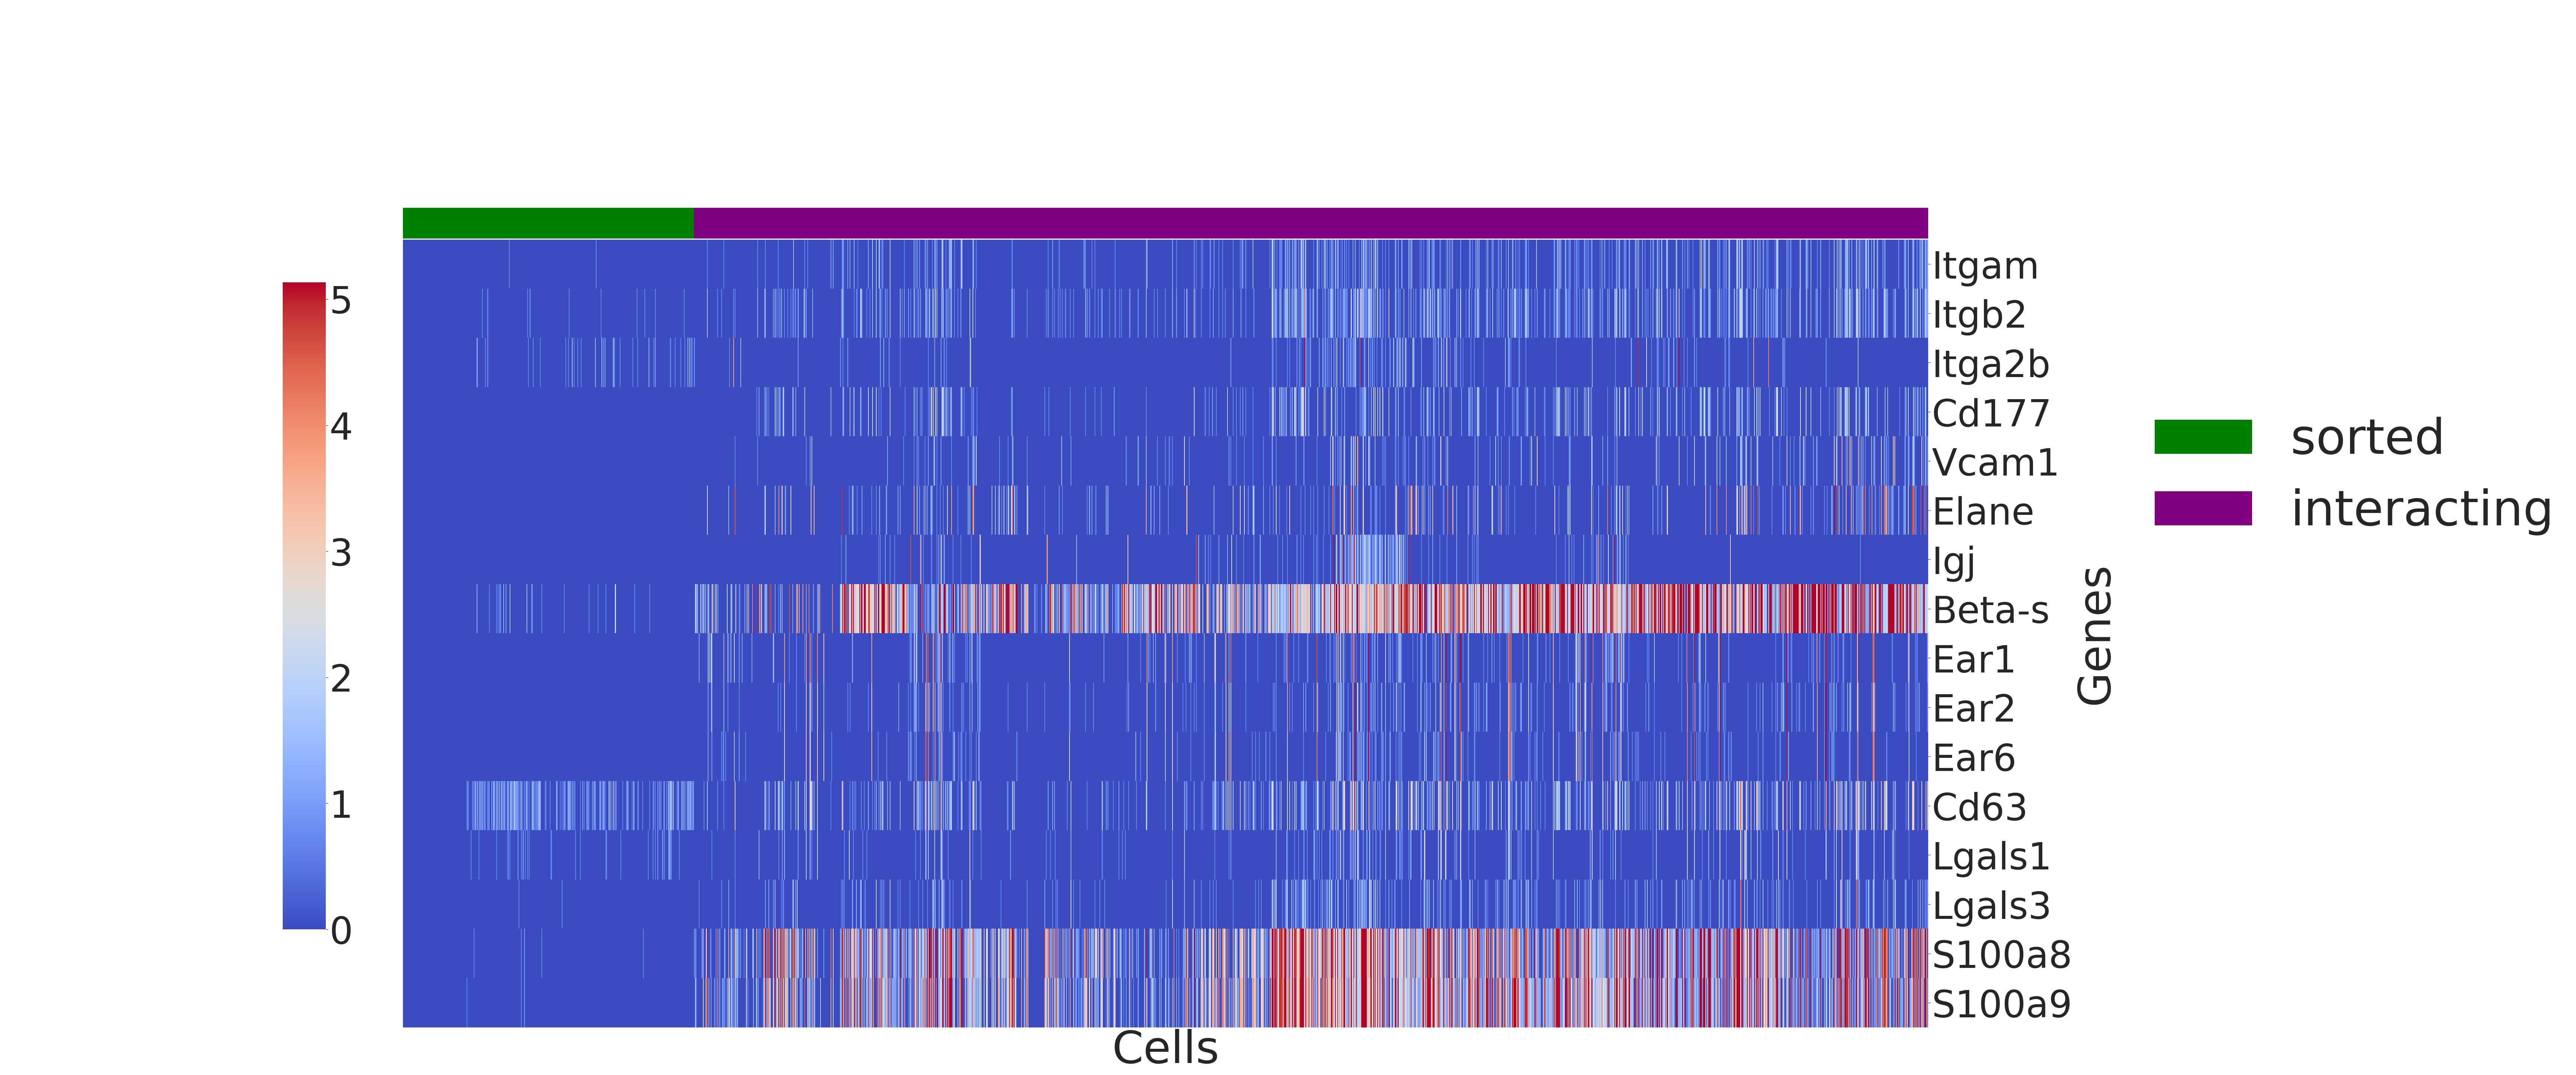

In [748]:
sb.set(font_scale=9)
green_sorted = mpatches.Patch(color="green", label="sorted")
purple_dissected = mpatches.Patch(color="purple", label='interacting')
legend_TN = [green_sorted, purple_dissected]
heatmap1 = sb.clustermap(np.log1p(all_cells.loc[["Itgam","Itgb2","Itga2b","Cd177","Vcam1","Elane","Igj","Beta-s",
                                                 "Ear1","Ear2","Ear6","Cd63","Lgals1","Lgals3",
                                                "S100a8","S100a9"]]),
                  figsize=(80,60),row_cluster=False, col_cluster=False,
                         robust=True,cmap='coolwarm',col_colors = colours)

heatmap1.ax_heatmap.set_xticks([])
heatmap1.ax_heatmap.set_xlabel("Cells",fontsize=120)
heatmap1.ax_heatmap.set_ylabel("Genes",fontsize=120)
heatmap1.cax.set_position(pos=Bbox(np.array([[0.15,0.4],[0.17,0.8]])))

l2 = heatmap1.ax_heatmap.legend(loc='center left',bbox_to_anchor=(1.12,0.70),handles=legend_TN,frameon=False,
                                fontsize="large")

plt.savefig("Boisset_new.png",bbox_inches='tight')
